In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
from sklearn.preprocessing import MinMaxScaler
from keras.utils import to_categorical
from numpy import argmax
from sklearn.cross_validation import train_test_split
import serial
import csv
import time
import os
from IPython import display
from IPython.display import clear_output
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

Using TensorFlow backend.
C:\Users\AbdurRehman\Miniconda3\envs\nnseries\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [14]:
df1 = pd.read_csv('APPLIANCE_TRAIN2.txt')
df1.drop(df1.columns[0], axis=1, inplace=True)
df1.drop(df1.columns[63], axis=1, inplace=True)
clean_dataset(df1)
df1.head()


,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,i55,i56,i57,i58,i59,i60,i61,i62,i63,Class
0,346.8,139.1,260.3,61.8,94.5,48.1,91.5,134.0,55.6,35.6,...,41.5,59.1,100.5,86.2,46.3,53.2,243.6,96.9,370.8,0.0
1,226.7,126.6,123.2,66.1,56.3,64.5,57.3,25.9,24.4,28.1,...,47.8,38.6,50.1,47.7,44.9,42.2,105.5,101.4,231.3,0.0
2,187.0,55.6,132.0,48.3,32.1,40.9,74.3,63.9,36.9,7.2,...,17.6,42.9,55.1,47.0,27.2,46.5,106.3,81.3,191.2,0.0
3,186.9,126.6,134.8,26.1,25.9,59.9,78.2,60.8,23.2,71.1,...,34.8,74.3,88.7,43.9,52.1,34.1,150.5,47.2,179.3,0.0
4,184.9,211.9,110.3,93.0,40.8,43.6,75.0,70.1,13.1,7.3,...,94.2,141.5,94.9,72.0,87.9,9.9,123.7,107.9,10.3,0.0


In [15]:
df2 = pd.read_csv('APPLIANCE_TEST.txt')
df2.drop(df2.columns[0], axis=1, inplace=True)
df2.drop(df2.columns[63], axis=1, inplace=True)
clean_dataset(df2)
df2.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,i55,i56,i57,i58,i59,i60,i61,i62,i63,Class
0,78.6,10955.9,47.8,18.2,16.3,123.6,20.5,61.9,11.1,147.1,...,27.4,92.3,43.0,46.8,73.6,126.6,97.4,178.4,65.3,0.0
1,214.5,10886.3,178.4,47.6,175.5,61.0,158.5,55.7,60.2,195.1,...,84.8,43.8,130.4,38.1,189.5,163.1,140.8,236.2,85.1,0.0
2,96.2,10784.9,97.3,100.2,97.5,45.5,73.9,76.8,51.5,112.2,...,93.3,135.1,108.2,100.8,41.4,45.1,127.4,167.9,94.1,0.0
3,122.4,10906.8,69.3,17.2,6.4,129.2,48.7,39.7,6.6,185.3,...,29.9,37.4,90.8,111.2,42.8,33.3,98.1,216.0,190.6,0.0
4,103.7,10865.8,82.0,25.7,95.5,93.9,41.0,54.9,9.6,122.1,...,36.2,41.8,59.4,55.8,52.0,50.8,131.5,84.7,114.1,0.0


In [16]:
#Making dataset for neural network
dataset = df1.values
X = dataset[:,0:126]
y = dataset[:,126]

In [17]:
#Scaling our data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_X = scaler.fit_transform(X)

In [18]:
#One hot encoding
encoded_Y = to_categorical(y)
inverted = argmax(encoded_Y[0])

In [19]:
#30% of the dataset stored as cross-validation set
X_train, X_val, y_train, y_val = train_test_split(scaled_X, encoded_Y, test_size=0.3, random_state=1)

In [186]:
#Creating NN model
model = Sequential()
model.add(Dense(20, input_dim=126, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(9, activation = 'softmax'))

#Compiling NN model
model.compile(Adam(lr = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [187]:
#Training the NN model
history = model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=3, verbose=1)

Train on 57652 samples, validate on 24708 samples
Epoch 1/3
57652/57652 [==============================] - 10s 180us/step - loss: 0.2693 - acc: 0.9173 - val_loss: 0.0780 - val_acc: 0.9864
Epoch 2/3
57652/57652 [==============================] - 3s 58us/step - loss: 0.0873 - acc: 0.9801 - val_loss: 0.0805 - val_acc: 0.9813
Epoch 3/3
57652/57652 [==============================] - 4s 64us/step - loss: 0.0755 - acc: 0.9842 - val_loss: 0.0721 - val_acc: 0.9860


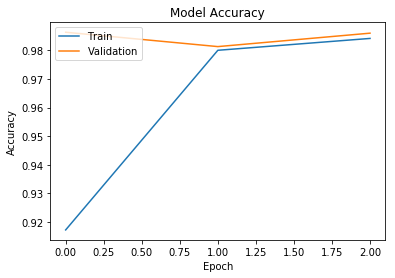

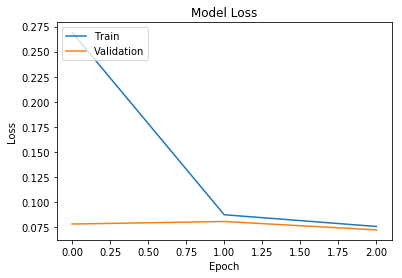

In [188]:
#Let's plot accuracy and loss over time on both our train and validation sets

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [20]:
#Getting our testing data ready
test_dataset = df2.values
X_test = test_dataset[:,0:126]
y_test = test_dataset[:,126]
scaled_Xtest = scaler.transform(X_test)
encoded_ytest = to_categorical(y_test)

In [190]:
#Evaluate model on the test set
model.evaluate(scaled_Xtest, encoded_ytest, verbose=1)

78768/78768 [==============================] - 4s 56us/step


[0.040707127068048216, 0.9903514117408084]

In [192]:
#Trying out real time testing data
df3 = pd.read_csv('Real_Time_Testing2.txt')
#df3 = pd.DataFrame(df3[0].str.split(',').tolist())
features = ['v0', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17',
            'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30', 'v31', 'v32', 'v33', 
            'v34', 'v35', 'v36', 'v37', 'v38', 'v39', 'v40', 'v41', 'v42', 'v43', 'v44', 'v45', 'v46', 'v47', 'v48', 'v49',
            'v50', 'v51', 'v52', 'v53', 'v54', 'v55', 'v56', 'v57', 'v58', 'v59', 'v60', 'v61', 'v62', 'v63', 
            'i0', 'i1', 'i2', 'i3', 'i4', 'i5', 'i6', 'i7', 'i8', 'i9', 'i10', 'i11', 'i12', 'i13', 'i14', 'i15', 'i16', 'i17', 
            'i18', 'i19', 'i20', 'i21', 'i22', 'i23', 'i24', 'i25', 'i26', 'i27', 'i28', 'i29', 'i30', 'i31', 'i32', 'i33', 
            'i34', 'i35', 'i36', 'i37', 'i38', 'i39', 'i40', 'i41', 'i42', 'i43', 'i44', 'i45', 'i46', 'i47', 'i48', 'i49', 
            'i50', 'i51', 'i52', 'i53', 'i54', 'i55', 'i56', 'i57', 'i58', 'i59', 'i60', 'i61', 'i62', 'i63']
#df3.drop(df3.columns[128:258], axis=1, inplace=True)
#df3.columns = features
#df3.i63 = df3.i63.str.replace('\r\r\n','')
df3.drop(df3.columns[0], axis=1, inplace=True)
df3.drop(df3.columns[63], axis=1, inplace=True)

test_dataset2 = df3.values
XRTT = test_dataset2[:,0:126]
yRTT = test_dataset2[:,126]
scaled_XRTT = scaler.transform(XRTT)
encoded_yRTT = to_categorical(yRTT)

In [193]:
model.evaluate(scaled_XRTT, encoded_yRTT, verbose=1)

2803/2803 [==============================] - 0s 75us/step


[4.1878994848848965, 0.6892615055723187]

In [842]:
ynew = model.predict_classes(scaled_XRTT)
np.set_printoptions(threshold=np.nan)
print(ynew)
len(ynew)

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 8 0 0 0 7 0 0 7 7 0 0 7 7 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 7 0 0 7 7 0 0 0 0 0 0 7 0 7 7 0 0 0 0 0 0 0 0 7 7 0 0 0 0 0
 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 7 0 0 0 7 0 0 0 0 7 0 0 0 7 0 0 0 0 0 0 0 0
 0 0 0 0 7 0 0 0 0 0 0 0 0 0 7 7 7 0 0 0 0 0 7 0 0 0 7 0 7 0 7 0 0 0 7 0 0
 0 0 7 0 0 0 7 0 0 0 0 0 7 0 0 7 0 0 0 0 7 0 7 7 0 0 0 0 0 0 0 0 7 7 0 0 0
 7 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 0 7 7 0 0 7 0 7 7 0 0 0 0 7 0 0 7 0 0 7
 7 0 0 0 7 0 0 0 0 0 0 0 7 7 7 7 0 0 0 7 7 7 0 0 7 0 0 0 0 0 0 0 0 0 7 7 0
 7 0 0 7 0 0 7 0 0 0 0 7 0 0 7 0 0 0 0 0 0 0 0 7 7 7 0 0 0 0 0 7 0 0 0 7 7
 0 0 7 0 0 0 0 7 0 7 0 0 0 0 7 7 0 7 0 0 0 7 7 0 7 0 0 0 7 7 7 7 0 0 0 0 7
 7 0 0 7 7 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 7 0 0 7 0 0 0 0 0 0 7 0 0
 0 0 0 7 0 7 7 0 0 7 7 7 0 0 7 0 0 0 7 0 0 0 0 0 7 0 0 0 0 0 0 7 0 0 7 7 0
 0 0 7 7 7 0 0 0 0 0 0 0 7 0 7 7 7 0 0 7 0 7 0 7 0 0 0 0 0 0 0 0 0 7 0 0 7
 7 0 0 0 0 0 7 0 0 0 7 0 0 7 0 0 0 0 7 0 7 0 0 7 0 0 0 0 0 0 0 0 0 0 0 7 7
 0 0 0 0 7 7 0 0 0 0 0 0 

2803

In [850]:
#Save your trained model architecture, weights, training configuration and optimizer details
model.save('FYP_ANN_noDC.h5')

In [21]:
model = load_model('FYP_ANN_noDC.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 20)                2540      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_9 (Dense)              (None, 9)                 99        
Total params: 2,849
Trainable params: 2,849
Non-trainable params: 0
_________________________________________________________________


In [59]:
test_model.get_weights()

[array([[-1.76771387e-01,  1.50737643e-01, -2.16797084e-01,
          6.56089365e-01, -6.30298853e-02, -2.65003592e-01,
          1.76820345e-02, -5.85690558e-01,  8.22437927e-03,
         -2.46201664e-01, -1.40226245e-01, -1.07656032e-01,
          5.29677927e-01, -1.72591403e-01, -3.10134798e-01,
          1.80071723e-02,  2.74675656e-02, -4.39187676e-01,
         -2.30409920e-01,  4.54376549e-01],
        [-7.82026350e-02,  3.86169888e-02, -6.77499399e-02,
         -3.78089547e-01, -1.48404259e-02,  1.04416519e-01,
          1.79946029e+00, -1.01367700e+00, -1.12816370e+00,
          8.30727756e-01,  7.56723061e-02, -2.31335104e-01,
          1.48221791e+00,  1.27278522e-01, -1.20854422e-01,
         -1.17808200e-01,  1.22521572e-01, -3.80241960e-01,
         -2.52382725e-01,  6.08806387e-02],
        [-2.27543220e-01, -4.45640124e-02, -3.45082879e-01,
          1.30963230e+00, -1.77380405e-02, -2.43780389e-01,
         -1.03374206e-01,  1.19970238e+00, -7.99321592e-01,
          1.

In [60]:
test_model.optimizer

In [12]:
model.evaluate(scaled_Xtest, encoded_ytest, verbose=1)

78768/78768 [==============================] - 6s 79us/step


[0.029069772126509262, 0.9953661385334146]

In [22]:
def make_prediction():
    ser1 = serial.Serial('COM3', 115200) 
    i = 0
    WeHaveArray = False
    while WeHaveArray==False:
        while i<5:
            try:
                #print('Loop has started lmao')      
                arduinoData = ser1.readline().decode('ascii')
                with open("make_prediction.txt", "a") as f:
                    writer = csv.writer(f)
                    writer.writerow([arduinoData])
                i=i+1
            except:
                print('')
        #print('Done writing 5 lines')
        df = pd.read_csv('make_prediction.txt', header=None)
        df = pd.DataFrame(df[0].str.split(',').tolist())
        features = ['v0', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17',
            'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30', 'v31', 'v32', 'v33', 
            'v34', 'v35', 'v36', 'v37', 'v38', 'v39', 'v40', 'v41', 'v42', 'v43', 'v44', 'v45', 'v46', 'v47', 'v48', 'v49',
            'v50', 'v51', 'v52', 'v53', 'v54', 'v55', 'v56', 'v57', 'v58', 'v59', 'v60', 'v61', 'v62', 'v63', 
            'i0', 'i1', 'i2', 'i3', 'i4', 'i5', 'i6', 'i7', 'i8', 'i9', 'i10', 'i11', 'i12', 'i13', 'i14', 'i15', 'i16', 'i17', 
            'i18', 'i19', 'i20', 'i21', 'i22', 'i23', 'i24', 'i25', 'i26', 'i27', 'i28', 'i29', 'i30', 'i31', 'i32', 'i33', 
            'i34', 'i35', 'i36', 'i37', 'i38', 'i39', 'i40', 'i41', 'i42', 'i43', 'i44', 'i45', 'i46', 'i47', 'i48', 'i49', 
            'i50', 'i51', 'i52', 'i53', 'i54', 'i55', 'i56', 'i57', 'i58', 'i59', 'i60', 'i61', 'i62', 'i63']
        if len(df.columns)==128:
            df.columns = features
            WeHaveArray = True
            #print(df.head())
            #print('Successfully retrieved data in 128 columns!')
        else:
            print("The columns were all wrong! Deleting file and re-trying")
            #WeHaveArray=False
            #os.remove("make_prediction.txt")
            break
    df.i63 = df.i63.str.replace('\r\r\n','')
    df.drop(df.columns[0], axis=1, inplace=True)
    df.drop(df.columns[63], axis=1, inplace=True)
    #print('Successfully cleaned the i63 column')
    clean_dataset(df)
    df = df.astype(np.float)
    #print('Successfully cleaned NaNs in the dataset')
    Xnew = np.array([df.iloc[2].values])
    scaled_Xnew = scaler.transform(Xnew)
    ynew = model.predict_classes(scaled_Xnew)
    if ynew[0]==0:
        print("\t\t\t\tPrediction = %s " % (ynew[0]) + 'which corresponds to No Load state')
    elif ynew[0]==1:
        print("\t\t\t\tPrediction = %s " % (ynew[0]) + 'which corresponds to Blow Drier Setting 2')
    elif ynew[0]==2:
        print("\t\t\t\tPrediction = %s " % (ynew[0]) + 'which corresponds to Edison Bulb')
    elif ynew[0]==3:
        print("\t\t\t\tPrediction = %s " % (ynew[0]) + 'which corresponds to Energy Saver')
    elif ynew[0]==4:
        print("\t\t\t\tPrediction = %s " % (ynew[0]) + 'which corresponds to Electric Kettle')
    elif ynew[0]==5:
        print("\t\t\t\tPrediction = %s " % (ynew[0]) + 'which corresponds to Edison Bulb + Blow Drier Setting 2')
    elif ynew[0]==6:
        print("\t\t\t\tPrediction = %s " % (ynew[0]) + 'which corresponds to Energy Saver + Blow Drier Setting 2')
    elif ynew[0]==7:
        print("\t\t\t\tPrediction = %s " % (ynew[0]) + 'which corresponds to Edison Bulb + Energy Saver')
    elif ynew[0]==8:
        print("\t\t\t\tPrediction = %s " % (ynew[0]) + 'which corresponds to Edison Bulb + Energy Saver + Blow Drier Setting 2')
    #Bar plot of voltage harmonics
    x1=['v1','v2','v3','v4','v5','v6','v7','v8','v9']
    x2=['i1', 'i2', 'i3', 'i4', 'i5', 'i6', 'i7', 'i8', 'i9']
    y=df.iloc[2].values
    fig, ax =plt.subplots(1,2, figsize=(15,5))
    a=sns.barplot(x1,y[0:9],ax=ax[0])
    b=sns.barplot(x2,y[63:72],ax=ax[1])
    a.axes.set_title('Voltage Harmonics')
    b.axes.set_title('Current Harmonics')
    plt.show()


				Prediction = 7 which corresponds to Edison Bulb + Energy Saver


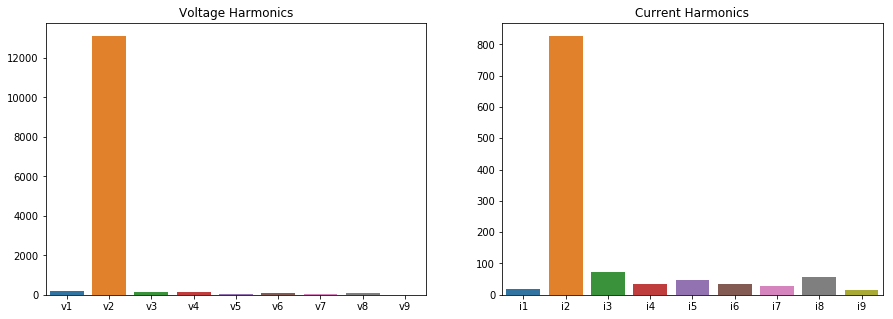

In [64]:
#Clear the screen before beginning
#clear_output()
#time.sleep(3)
#If file does not exist, then run the function
if os.access('make_prediction.txt', os.F_OK)==False:
    make_prediction()
#If file exists, first delete it, then run the function
else:
    os.remove("make_prediction.txt")
    #print("File Removed!")
    make_prediction()

In [70]:
def make_prediction():
    ser1 = serial.Serial('COM3', 115200) 
    i = 0
    WeHaveArray = False
    while WeHaveArray==False:
        while i<5:
            try:
                #print('Loop has started lmao')      
                arduinoData = ser1.readline().decode('ascii')
                with open("make_prediction.txt", "a") as f:
                    writer = csv.writer(f)
                    writer.writerow([arduinoData])
                i=i+1
            except:
                print('')
        #print('Done writing 5 lines')
        df = pd.read_csv('make_prediction.txt', header=None)
        df = pd.DataFrame(df[0].str.split(',').tolist())
        features = ['v0', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17',
            'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30', 'v31', 'v32', 'v33', 
            'v34', 'v35', 'v36', 'v37', 'v38', 'v39', 'v40', 'v41', 'v42', 'v43', 'v44', 'v45', 'v46', 'v47', 'v48', 'v49',
            'v50', 'v51', 'v52', 'v53', 'v54', 'v55', 'v56', 'v57', 'v58', 'v59', 'v60', 'v61', 'v62', 'v63', 
            'i0', 'i1', 'i2', 'i3', 'i4', 'i5', 'i6', 'i7', 'i8', 'i9', 'i10', 'i11', 'i12', 'i13', 'i14', 'i15', 'i16', 'i17', 
            'i18', 'i19', 'i20', 'i21', 'i22', 'i23', 'i24', 'i25', 'i26', 'i27', 'i28', 'i29', 'i30', 'i31', 'i32', 'i33', 
            'i34', 'i35', 'i36', 'i37', 'i38', 'i39', 'i40', 'i41', 'i42', 'i43', 'i44', 'i45', 'i46', 'i47', 'i48', 'i49', 
            'i50', 'i51', 'i52', 'i53', 'i54', 'i55', 'i56', 'i57', 'i58', 'i59', 'i60', 'i61', 'i62', 'i63']
        if len(df.columns)==128:
            df.columns = features
            WeHaveArray = True
            #print(df.head())
            #print('Successfully retrieved data in 128 columns!')
        else:
            print("The columns were all wrong! Deleting file and re-trying")
            WeHaveArray=False
            os.remove("make_prediction.txt")
            #break
    df.i63 = df.i63.str.replace('\r\r\n','')
    df.drop(df.columns[0], axis=1, inplace=True)
    df.drop(df.columns[63], axis=1, inplace=True)
    #print('Successfully cleaned the i63 column')
    clean_dataset(df)
    df = df.astype(np.float)
    #print('Successfully cleaned NaNs in the dataset')
    Xnew = np.array([df.iloc[2].values])
    scaled_Xnew = scaler.transform(Xnew)
    ynew = model.predict_classes(scaled_Xnew)
    if ynew[0]==0:
        print("\t\t\t\tPrediction = %s " % (ynew[0]) + 'which corresponds to No Load state')
    elif ynew[0]==1:
        print("\t\t\t\tPrediction = %s " % (ynew[0]) + 'which corresponds to Blow Drier Setting 2')
    elif ynew[0]==2:
        print("\t\t\t\tPrediction = %s " % (ynew[0]) + 'which corresponds to Edison Bulb')
    elif ynew[0]==3:
        print("\t\t\t\tPrediction = %s " % (ynew[0]) + 'which corresponds to Energy Saver')
    elif ynew[0]==4:
        print("\t\t\t\tPrediction = %s " % (ynew[0]) + 'which corresponds to Electric Kettle')
    elif ynew[0]==5:
        print("\t\t\t\tPrediction = %s " % (ynew[0]) + 'which corresponds to Edison Bulb + Blow Drier Setting 2')
    elif ynew[0]==6:
        print("\t\t\t\tPrediction = %s " % (ynew[0]) + 'which corresponds to Energy Saver + Blow Drier Setting 2')
    elif ynew[0]==7:
        print("\t\t\t\tPrediction = %s " % (ynew[0]) + 'which corresponds to Edison Bulb + Energy Saver')
    elif ynew[0]==8:
        print("\t\t\t\tPrediction = %s " % (ynew[0]) + 'which corresponds to Edison Bulb + Energy Saver + Blow Drier Setting 2')
    #Bar plot of voltage harmonics
    x1=['v1','v2','v3','v4','v5','v6','v7','v8','v9']
    x2=['i1', 'i2', 'i3', 'i4', 'i5', 'i6', 'i7', 'i8', 'i9']
    y=df.iloc[2].values
    plt.bar(x1, y[0:9])
    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(1)

The columns were all wrong! Deleting file and re-trying


FileNotFoundError: File b'make_prediction.txt' does not exist

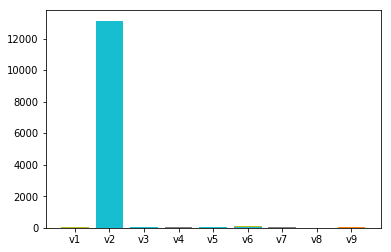

In [72]:
%matplotlib inline
while True:
    if os.access('make_prediction.txt', os.F_OK)==False:
        make_prediction()
    #If file exists, first delete it, then run the function
    else:
        os.remove("make_prediction.txt")
        #print("File Removed!")
        make_prediction()